<a href="https://colab.research.google.com/github/lluvliec/ECOLUX-LPJ/blob/main/DATAANALYSISFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Syarifah ALya Alhasni
- **Email:** syarifahalyaa23@gmail.com
- **ID Dicoding:** MS079D5X0584

# Menentukan Pertanyaan Bisnis

*   Kapan Waktu Peminjaman Sepeda Paling Ramai dalam Sehari?
*   Bagaimana Pengaruh Cuaca terhadap Peminjaman Sepeda?
*   Apakah Peminjaman Lebih Banyak di Hari Kerja atau Akhir Pekan?






## Menyaipkan semua library yang dibuthkan

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [160]:
day_df = pd.read_csv("https://raw.githubusercontent.com/lluvliec/analysisdata-python/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [161]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/lluvliec/analysisdata-python/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `hour_df`

In [162]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [163]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [164]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [165]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [166]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel `day_df`

In [167]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [168]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [169]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [170]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [171]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [172]:
print(day_df[['temp', 'atemp']].describe())

             temp       atemp
count  731.000000  731.000000
mean     0.495385    0.474354
std      0.183051    0.162961
min      0.059130    0.079070
25%      0.337083    0.337842
50%      0.498333    0.486733
75%      0.655417    0.608602
max      0.861667    0.840896


In [173]:
day_df.groupby(['weekday', 'workingday', 'holiday']).size()


weekday  workingday  holiday
0        0           0          105
1        0           1           15
         1           0           90
2        0           1            1
         1           0          103
3        0           1            1
         1           0          103
4        0           1            2
         1           0          102
5        0           1            2
         1           0          102
6        0           0          105
dtype: int64

In [174]:
day_df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


In [175]:
day_df.groupby('mnth')['season'].value_counts()


mnth  season
1     1         62
2     1         57
3     1         40
      2         22
4     2         60
5     2         62
6     2         40
      3         20
7     3         62
8     3         62
9     3         44
      4         16
10    4         62
11    4         60
12    4         40
      1         22
Name: count, dtype: int64

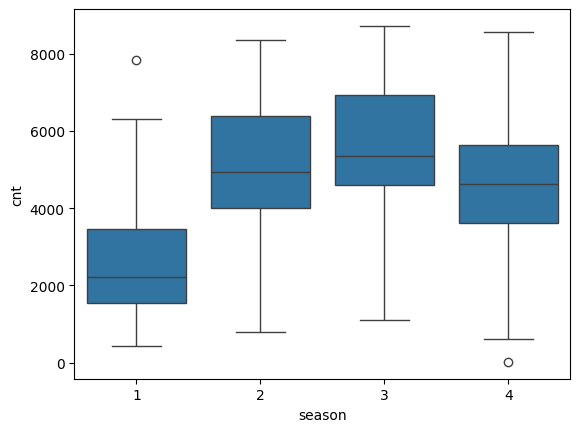

In [176]:
sns.boxplot(x='season', y='cnt', data=day_df)
plt.show()

In [177]:
day_df['weekday'].unique()


array([6, 0, 1, 2, 3, 4, 5])

### Cleaning Data

#### Membersihkan tabel `hour_df`

##### Mengamputasi nilai 0.00 yang berkemungkinan besar bukan nilai asli atau data yang tidak terekam benar


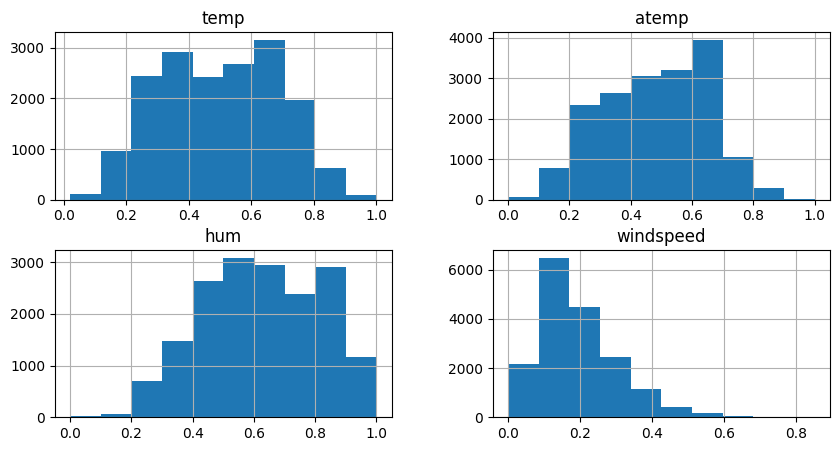

In [178]:
hour_df[["temp", "atemp", "hum", "windspeed"]].hist(figsize=(10,5))
plt.show()


In [179]:
print("Jumlah data windspeed = 0:", (hour_df["windspeed"] == 0).sum())


Jumlah data windspeed = 0: 2180


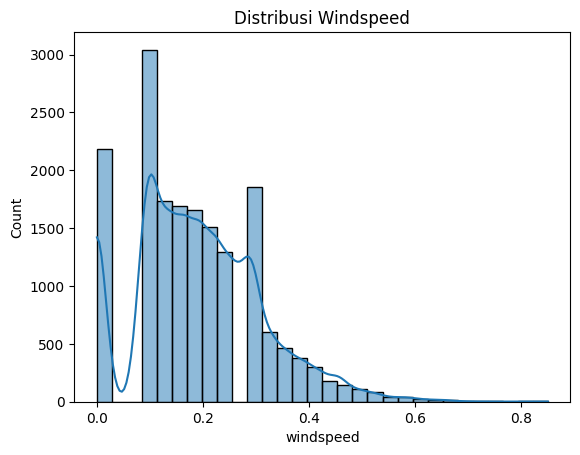

In [180]:
sns.histplot(hour_df["windspeed"], bins=30, kde=True)
plt.title("Distribusi Windspeed")
plt.show()

In [181]:
hour_df["windspeed"] = hour_df["windspeed"].replace(0, np.nan)


In [182]:
hour_df["windspeed"].isna().sum()


2180

In [183]:
hour_df["windspeed"] = hour_df.groupby(["season", "hr"])["windspeed"].transform(lambda x: x.replace(0, x.median()))


In [184]:
print("Jumlah NaN di windspeed:", hour_df["windspeed"].isna().sum())


Jumlah NaN di windspeed: 2180


In [185]:
print("Jumlah 0 di windspeed:", (hour_df['windspeed'] == 0).sum())
print("Jumlah NaN di windspeed:", hour_df['windspeed'].isna().sum())


Jumlah 0 di windspeed: 0
Jumlah NaN di windspeed: 2180


In [186]:
hour_df['windspeed'] = hour_df['windspeed'].replace(0, np.nan)
hour_df['windspeed'].fillna(hour_df['windspeed'].median(), inplace=True)


<ipython-input-186-ae3c1a0df75d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df['windspeed'].fillna(hour_df['windspeed'].median(), inplace=True)


In [187]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.214433,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.099215,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### dteday berisi data tanggal dalam format object (string). Kita mengganti nya menjadi format datetime untuk memudahkan analisis waktu.


In [188]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])


In [189]:
print(hour_df["season"].unique())
print(hour_df["yr"].unique())
print(hour_df["mnth"].unique())
print(hour_df["hr"].unique())
print(hour_df["weekday"].unique())
print(hour_df["holiday"].unique())
print(hour_df["workingday"].unique())
print(hour_df["weathersit"].unique())


[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[6 0 1 2 3 4 5]
[0 1]
[0 1]
[1 2 3 4]


In [190]:
print(hour_df.dtypes)


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


#####  Terdapa Oulier karnya hanya ada 3 data dari 17,379 total data dan itu kueang signifikan

In [191]:
print(hour_df['weathersit'].value_counts())


weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


In [192]:
print(hour_df[hour_df['weathersit'] == 4][['dteday', 'hr', 'cnt']])


         dteday  hr  cnt
585  2011-01-26  16   36
8854 2012-01-09  18  164
9123 2012-01-21   1   23


In [193]:
hour_df = hour_df[hour_df['weathersit'] != 4]


#### Membersihkan tabel `day_df`

###### memperbaiki working day memiliki nilai 1 bersamaan dengan nilai holiday yang bernilai 1

In [194]:
day_df[ (day_df['holiday'] == 1) & (day_df['workingday'] == 1) ]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


##### mengganti weekday yang memiliki nilai 6 (sabtu dluan), maka dari itu di ganti jadi minggu dluan(0)

In [195]:
day_df['weekday'] = (day_df['weekday'] + 1) % 7

## Exploratory Data Analysis (EDA)

### Explore `hour_df`




memerika struktur data

In [196]:
hour_df.shape


(17376, 17)

In [197]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9669,9670,2012-02-12,1,1,2,20,0,0,0,1,0.14,0.1212,0.42,0.3284,1,56,57
15524,15525,2012-10-14,4,1,10,1,0,0,0,1,0.42,0.4242,0.77,0.2836,16,96,112
7523,7524,2011-11-15,4,0,11,2,0,2,1,1,0.56,0.5303,0.64,0.2537,7,8,15
1121,1122,2011-02-19,1,0,2,11,0,6,0,1,0.44,0.4394,0.16,0.5821,47,76,123
5465,5466,2011-08-20,3,0,8,15,0,6,0,1,0.80,0.7273,0.43,0.1940,175,215,390


In [198]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17376 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17376 non-null  int64         
 1   dteday      17376 non-null  datetime64[ns]
 2   season      17376 non-null  int64         
 3   yr          17376 non-null  int64         
 4   mnth        17376 non-null  int64         
 5   hr          17376 non-null  int64         
 6   holiday     17376 non-null  int64         
 7   weekday     17376 non-null  int64         
 8   workingday  17376 non-null  int64         
 9   weathersit  17376 non-null  int64         
 10  temp        17376 non-null  float64       
 11  atemp       17376 non-null  float64       
 12  hum         17376 non-null  float64       
 13  windspeed   17376 non-null  float64       
 14  casual      17376 non-null  int64         
 15  registered  17376 non-null  int64         
 16  cnt         17376 non-null 

In [199]:
hour_df.describe()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17376.000000,17376,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000
mean,8690.431918,2012-01-02 04:34:43.425414400,2.501899,0.502532,6.538732,11.546731,0.028775,3.003626,0.682723,1.424839,0.497041,0.475825,0.627185,0.214435,35.681918,153.801047,189.482965
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.750000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8689.500000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13035.250000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.084667,NaN,1.106838,0.500008,3.438303,6.914283,0.167179,2.005758,0.465430,0.638516,0.192529,0.171822,0.192917,0.099215,49.307369,151.364364,181.395022


distribusi jumlah peminjaman sepedah cnt

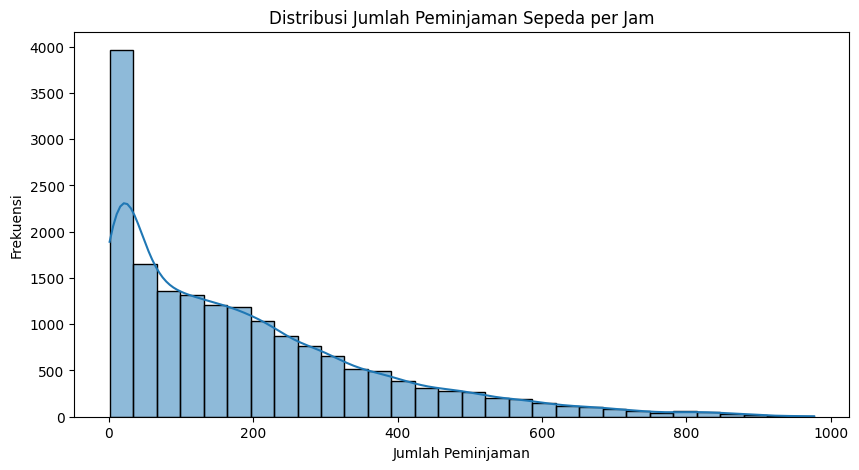

In [200]:
plt.figure(figsize=(10, 5))
sns.histplot(hour_df["cnt"], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Jam")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()


jumlah peminjaman sepedah berdasarkan jam dalam sehari

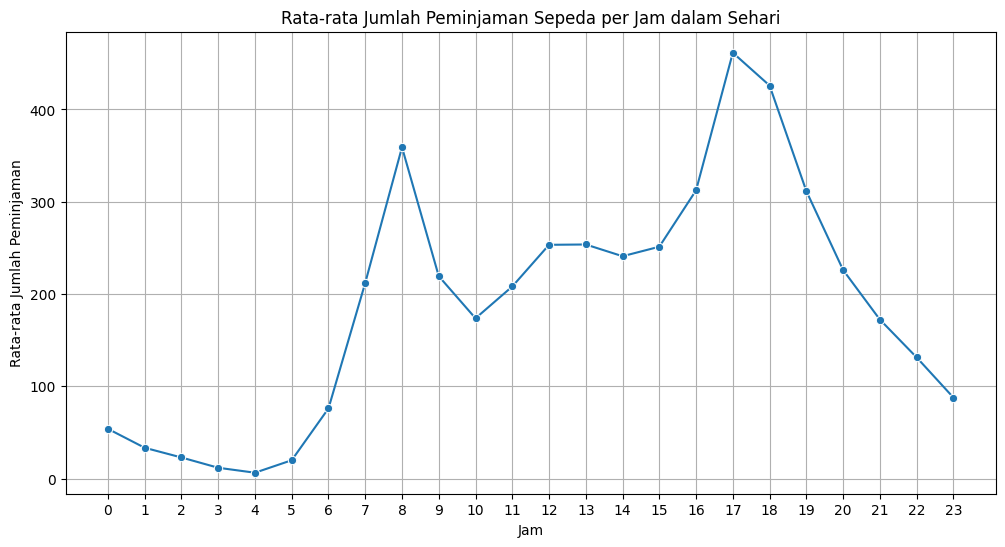

In [201]:
avg_hourly = hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_hourly.index, y=avg_hourly.values, marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

jumlah peminjaman sepedah pada hari kerja vs hari pekan

<ipython-input-202-b215980afe6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_type', y='cnt', data=hour_df, palette=['orange', 'blue'])


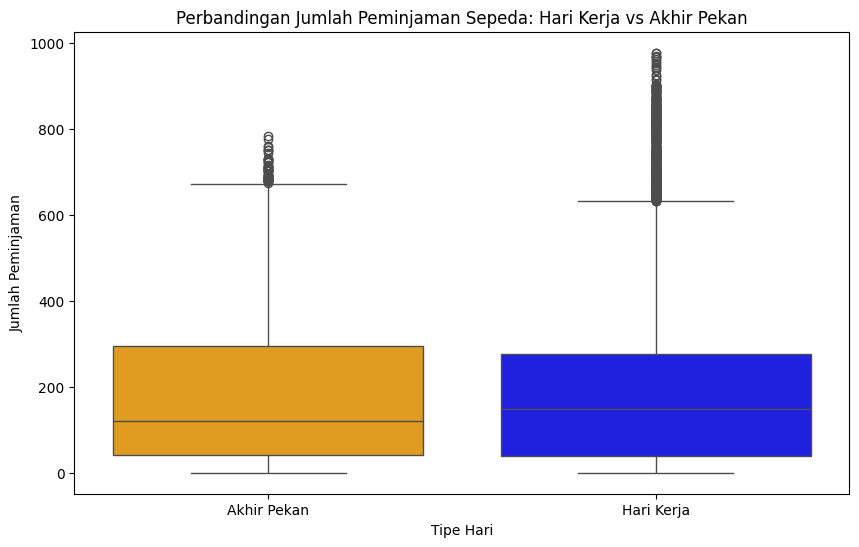

In [202]:
hour_df['day_type'] = hour_df['weekday'].apply(lambda x: 'Akhir Pekan' if x in [0, 6] else 'Hari Kerja')
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_type', y='cnt', data=hour_df, palette=['orange', 'blue'])
plt.title('Perbandingan Jumlah Peminjaman Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Explore `day_df`

In [203]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [204]:

day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.991792,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.002037,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


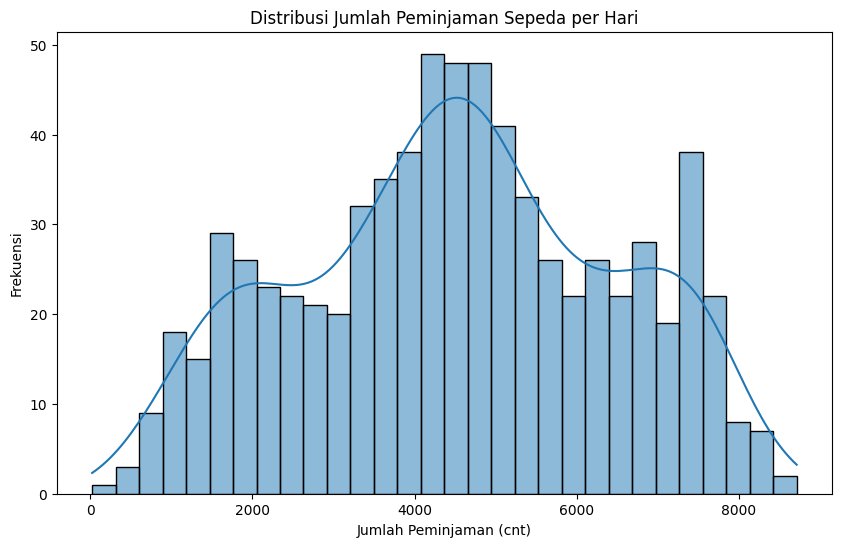

In [205]:
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Hari')
plt.xlabel('Jumlah Peminjaman (cnt)')
plt.ylabel('Frekuensi')
plt.show()

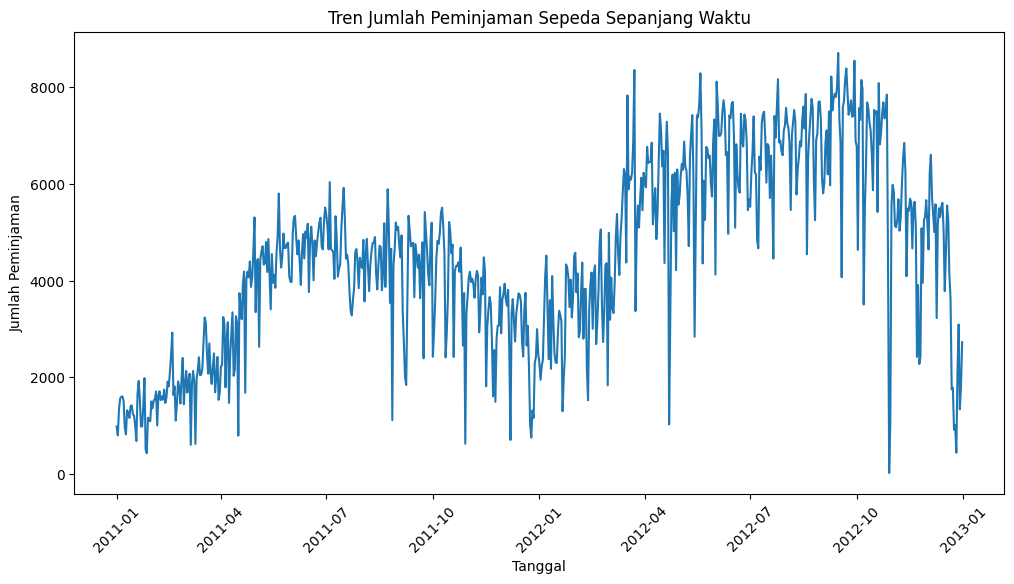

In [206]:

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
plt.figure(figsize=(12, 6))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'])
plt.title('Tren Jumlah Peminjaman Sepeda Sepanjang Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()


<ipython-input-207-53a16b15ddcf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_label', y='cnt', data=day_df, palette='coolwarm')


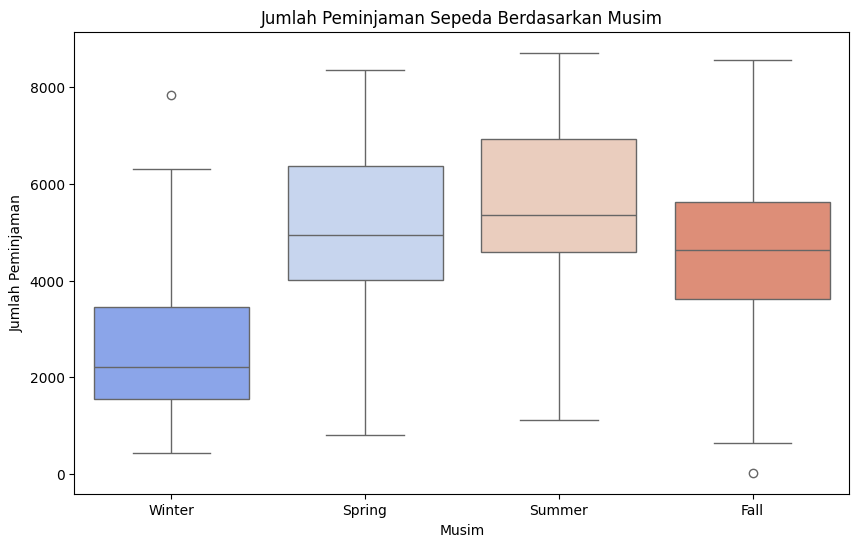

In [207]:
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season_label'] = day_df['season'].map(season_labels)
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_label', y='cnt', data=day_df, palette='coolwarm')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

<ipython-input-208-13414daba367>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_label', y='cnt', data=day_df, palette='viridis')


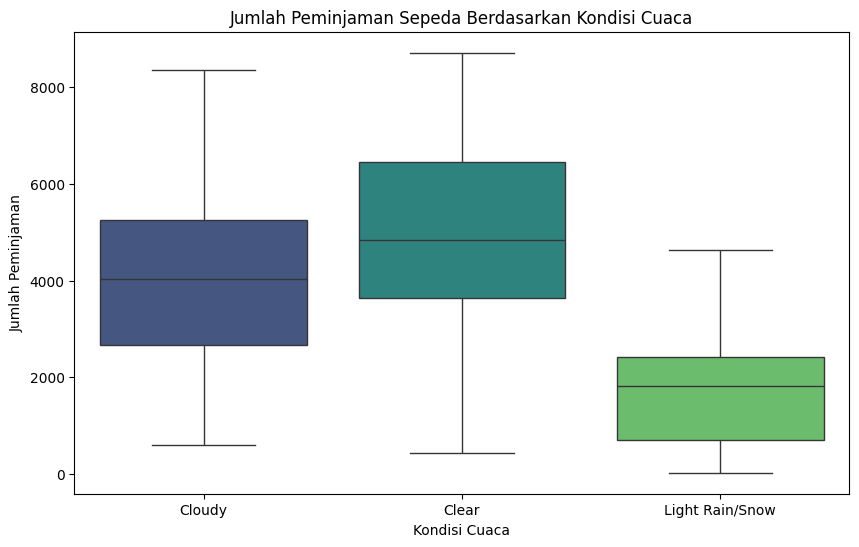

In [208]:

weather_labels = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weather_label'] = day_df['weathersit'].map(weather_labels)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_label', y='cnt', data=day_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()


### Explore `day_df` & `hour_df`

#### Menggabungkan data `day_df` dan `hour_df`

In [209]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])


In [210]:
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    on="dteday",
    suffixes=("_hour", "_day")  # Supaya kolom yang sama punya label berbeda
)

In [211]:
hour_day_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season_label,weather_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy


total peminjaman berdasarkan mesin

In [212]:
hour_day_df.groupby(by="season_day").agg({
    "instant_hour": "nunique",  # Jumlah jam data
    "cnt_hour": "sum"  # Total peminjaman sepeda
}).sort_values(by="cnt_hour", ascending=False)


,instant_hour,cnt_hour
season_day,,
3,4496,1061129
2,4409,918589
4,4232,841613
1,4239,471125


Total peminjaman berdasarkan hari kerja atau libur

In [213]:
hour_day_df.groupby(by="workingday_day").agg({
    "instant_hour": "nunique",
    "cnt_hour": "sum"
})


,instant_hour,cnt_hour
workingday_day,,
0,5513,1000246
1,11863,2292210


Total peminjaman berdasarkan kondisi cuaca

In [214]:
hour_day_df.groupby(by="weathersit_day").agg({
    "cnt_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)


,cnt_hour
weathersit_day,
1,2257952
2,996671
3,37833


Total peminjaman berdasarkan jam dalam sehari

In [215]:
hour_day_df.groupby(by="hr").agg({
    "cnt_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)


,cnt_hour
hr,
17,336860
18,309608
8,261001
16,227712
19,226789
13,184919
12,184414
15,183149
14,175652


### Explore all data

#### Menghubungkan semua data

In [216]:
print(all_df.columns)


Index(['instant_hour', 'dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'day_type', 'instant_day', 'season_day',
       'yr_day', 'mnth_day', 'holiday_day', 'weekday_day', 'workingday_day',
       'weathersit_day', 'temp_day', 'atemp_day', 'hum_day', 'windspeed_day',
       'casual_day', 'registered_day', 'cnt_day', 'season_label',
       'weather_label'],
      dtype='object')


In [217]:
all_df = hour_day_df.copy()
all_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season_label,weather_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Cloudy


In [218]:
all_df.groupby(by=["season_day", "weathersit_day"]).agg({
    "cnt_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)


,,cnt_hour
season_day,weathersit_day,
3,1,799443
2,1,626986
4,1,519487
1,1,312036
4,2,302510
2,2,288096
3,2,250679
1,2,155386
4,3,19616


In [219]:
all_df.groupby(by=["workingday_day", "hr"]).agg({
    "cnt_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)


cnt_hour
workingday_day hr          
1              17    262120
               18    244965
               8     236595
               19    173504
               16    146232
               7     144144
               20    124360
               9     119793
               15    100263
               12     99808
               13     98818
               21     92771
               14     91419
0              13     86101
               12     84606
               14     84233
               15     82886
               16     81480
1              11     78482
0              17     74740
               11     72838
1              22     68918
               10     67142
0              18     64643
               10     59115
               19     53285
1              6      50840
               23     44177
0              20     40190
               9      39645
               21     32674
               22     26694
               8      24406
               0      20884
               23     19764
1              0      18246
0              1      15964
1              5      12332
0              2      12123
               7      10027
1              1       8177
0              3       5851
               6       4292
1              2       4229
               4       2552
               3       2323
0              5       1929
               4       1876

In [220]:
all_df.groupby(by=["weathersit_day", "hr"]).agg({
    "cnt_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)


cnt_hour
weathersit_day hr          
1              17    230582
               18    212782
               8     174555
               16    157406
               19    156234
...                     ...
3              1        358
               2        247
               5        246
               3        129
               4         92

[72 rows x 1 columns]

In [221]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### 1. Kapan Waktu Peminjaman Sepeda Paling Ramai dalam Sehari?

In [222]:
all_df.sample(5)

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season_label,weather_label
2079,2081,2011-04-01,2,0,4,13,0,5,1,1,...,2,0.300000,0.283454,0.686250,0.258708,307,1920,2227,Spring,Cloudy
16815,16819,2012-12-08,4,1,12,13,0,6,0,2,...,2,0.381667,0.389508,0.911250,0.101379,1153,4429,5582,Fall,Cloudy
10609,10613,2012-03-23,2,1,3,7,0,5,1,2,...,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362,Spring,Cloudy
8038,8040,2011-12-06,4,0,12,15,0,2,1,3,...,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594,Fall,Light Rain/Snow
15046,15050,2012-09-24,4,1,9,6,0,1,1,1,...,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436,Fall,Clear


<ipython-input-223-2b426430af3a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=all_df["hr"], y=all_df["cnt_hour"], ci=None, palette="Blues_r")
<ipython-input-223-2b426430af3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_df["hr"], y=all_df["cnt_hour"], ci=None, palette="Blues_r")


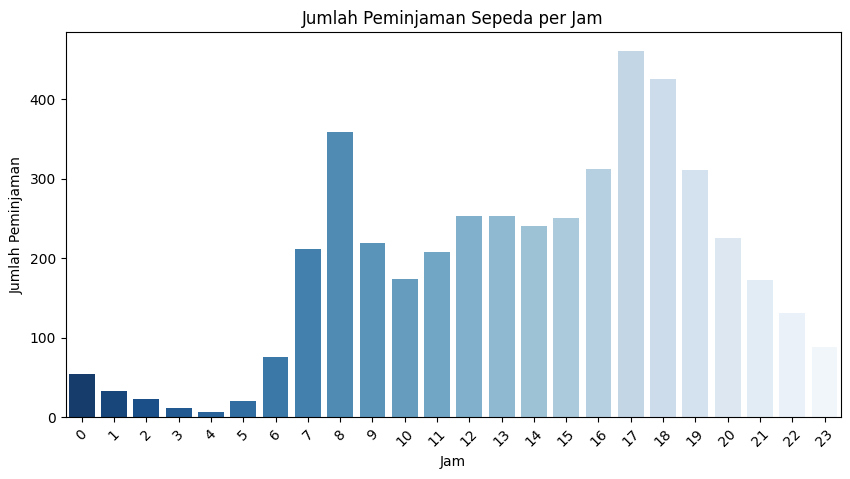

In [223]:
plt.figure(figsize=(10, 5))
sns.barplot(x=all_df["hr"], y=all_df["cnt_hour"], ci=None, palette="Blues_r")
plt.title("Jumlah Peminjaman Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.show()

### Bagaimana Pengaruh Cuaca terhadap Peminjaman Sepeda?

<ipython-input-224-f68240d60bd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=all_df["weathersit_day"], y=all_df["cnt_hour"], palette="coolwarm")


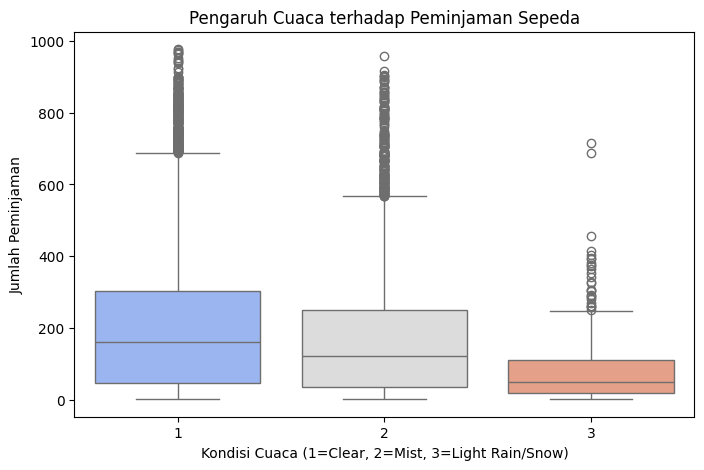

In [224]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=all_df["weathersit_day"], y=all_df["cnt_hour"], palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Rain/Snow)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

### Apakah Peminjaman Lebih Banyak di Hari Kerja atau Akhir Pekan?

<ipython-input-225-81efc66db4b7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=all_df["workingday_day"], y=all_df["cnt_hour"], ci=None, palette="Set2")
<ipython-input-225-81efc66db4b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_df["workingday_day"], y=all_df["cnt_hour"], ci=None, palette="Set2")


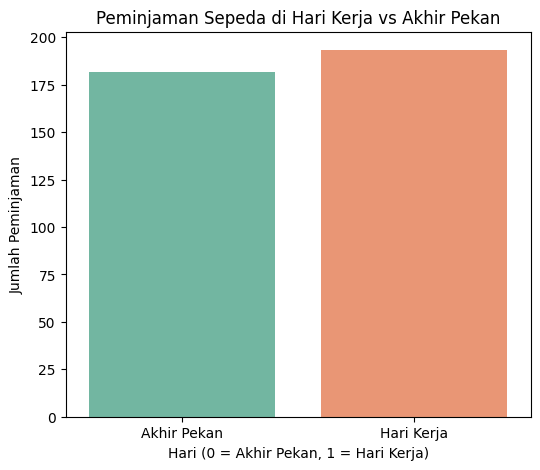

In [225]:
plt.figure(figsize=(6, 5))
sns.barplot(x=all_df["workingday_day"], y=all_df["cnt_hour"], ci=None, palette="Set2")
plt.title("Peminjaman Sepeda di Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Jumlah Peminjaman")
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.show()


### RFM Analysis

##### Menentukan Recency, Frequency, dan Monetary

In [226]:
rfm_df = all_df.groupby(by="dteday", as_index=False).agg({
    "dteday": "max",  # Mengambil tanggal terakhir peminjaman
    "cnt_day": "sum",  # Total peminjaman sepeda (Frequency)
    "casual_day": "sum",  # Bisa dianggap sebagai Monetary (Total user casual)
    "registered_day": "sum"  # Ditambah total user registered
})

In [227]:
print(rfm_df.head())

      dteday  cnt_day  casual_day  registered_day
0 2011-01-01    23640        7944           15696
1 2011-01-02    18423        3013           15410
2 2011-01-03    29678        2640           27038
3 2011-01-04    35926        2484           33442
4 2011-01-05    36800        1886           34914


In [228]:
print(rfm_df.columns)

Index(['dteday', 'cnt_day', 'casual_day', 'registered_day'], dtype='object')


In [229]:
# Rename kolom
rfm_df.columns = ["dteday", "frequency", "casual_monetary", "registered_monetary"]


In [230]:
rfm_df["monetary"] = rfm_df["casual_monetary"] + rfm_df["registered_monetary"]


In [231]:
rfm_df["max_rent_timestamp"] = pd.to_datetime(rfm_df["dteday"])
recent_date = all_df["dteday"].max()  # Tanggal terakhir dalam dataset
rfm_df["recency"] = (recent_date - rfm_df["max_rent_timestamp"]).dt.days


In [232]:
rfm_df.drop("max_rent_timestamp", axis=1, inplace=True)


In [233]:
print(rfm_df.head())

      dteday  frequency  casual_monetary  registered_monetary  monetary  \
0 2011-01-01      23640             7944                15696     23640   
1 2011-01-02      18423             3013                15410     18423   
2 2011-01-03      29678             2640                27038     29678   
3 2011-01-04      35926             2484                33442     35926   
4 2011-01-05      36800             1886                34914     36800   

   recency  
0      730  
1      729  
2      728  
3      727  
4      726  


#####  Ranking RFM Score

In [234]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)  # Semakin kecil recency semakin baik
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)  # Semakin sering peminjaman semakin baik
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)  # Semakin banyak peminjaman semakin baik


In [235]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100


In [236]:
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)


In [237]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm'] + 0.28 * \
    rfm_df['f_rank_norm'] + 0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)


In [238]:
print(rfm_df[['dteday', 'RFM_score']].head(7))

      dteday  RFM_score
0 2011-01-01       0.12
1 2011-01-02       0.07
2 2011-01-03       0.21
3 2011-01-04       0.31
4 2011-01-05       0.35
5 2011-01-06       0.37
6 2011-01-07       0.28


##### Segmentasi Pelanggan Berdasarkan RFM Score

In [239]:
rfm_df["bike_usage_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "High Demand Days",
    np.where(
        rfm_df['RFM_score'] > 4, "Moderate Demand Days",
        np.where(
            rfm_df['RFM_score'] > 3, "Regular Usage Days",
            np.where(
                rfm_df['RFM_score'] > 1.6, 'Low Usage Days',
                'Very Low Usage Days'
            )
        )
    )
)

In [240]:
print(rfm_df[['dteday', 'RFM_score', 'bike_usage_segment']].head(10))

      dteday  RFM_score   bike_usage_segment
0 2011-01-01       0.12  Very Low Usage Days
1 2011-01-02       0.07  Very Low Usage Days
2 2011-01-03       0.21  Very Low Usage Days
3 2011-01-04       0.31  Very Low Usage Days
4 2011-01-05       0.35  Very Low Usage Days
5 2011-01-06       0.37  Very Low Usage Days
6 2011-01-07       0.28  Very Low Usage Days
7 2011-01-08       0.12  Very Low Usage Days
8 2011-01-09       0.09  Very Low Usage Days
9 2011-01-10       0.24  Very Low Usage Days


###### Visualisasi Segmentasi Pelanggan

In [241]:
bike_usage_df = rfm_df.groupby(by="bike_usage_segment", as_index=False)["dteday"].nunique()


In [242]:
bike_usage_df['bike_usage_segment'] = pd.Categorical(
    bike_usage_df['bike_usage_segment'],
    ["Very Low Usage Days", "Low Usage Days", "Regular Usage Days",
     "Moderate Demand Days", "High Demand Days"]
)

<ipython-input-243-380f0f8b5e22>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


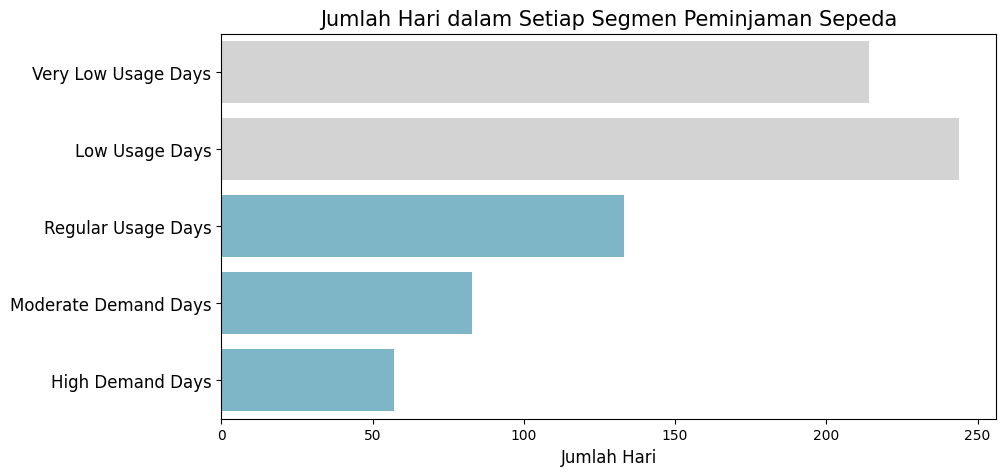

In [243]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    x="dteday",
    y="bike_usage_segment",
    data=bike_usage_df.sort_values(by="bike_usage_segment", ascending=False),
    palette=colors_
)
plt.title("Jumlah Hari dalam Setiap Segmen Peminjaman Sepeda", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Jumlah Hari", fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()